## Prepare the Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/titanic3.csv')

In [3]:
pd.set_option('display.max_rows', None)

In [4]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [6]:
# df.replace('?', np.nan, inplace=True)
# df.replace('?', None, inplace=True)
df = df.astype({'age': np.float64, 'fare': np.float64})

## Plotting

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='survived', ylabel='fare'>

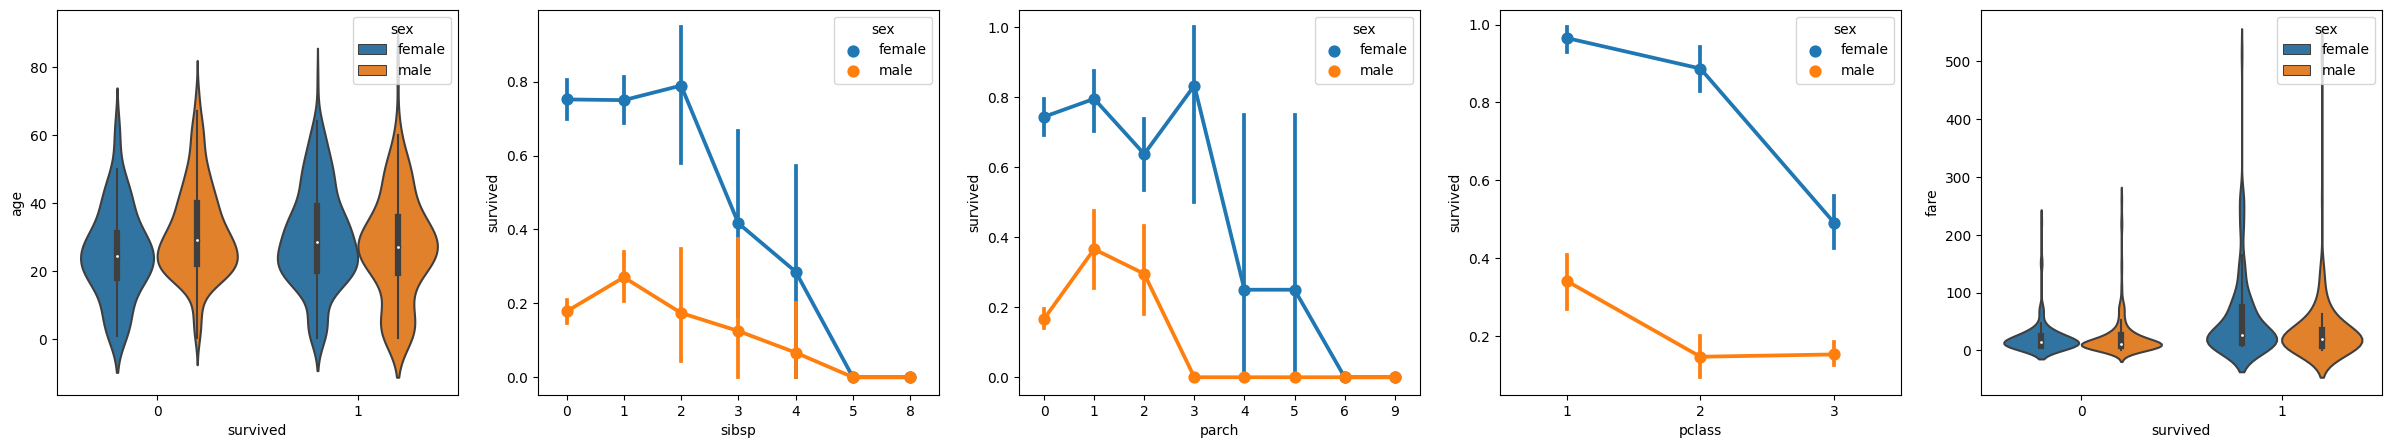

In [8]:
# supress warnings for this cell
import warnings
warnings.filterwarnings('ignore')

fig, axs = plt.subplots(ncols=5, figsize=(30, 5))
sns.violinplot(x='survived', y='age', hue='sex', data=df, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=df, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=df, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=df, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=df, ax=axs[4])

<Axes: xlabel='survived', ylabel='age'>

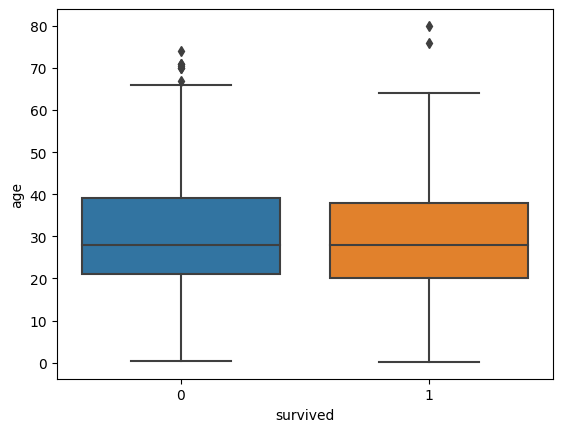

In [9]:
sns.boxplot(x='survived', y='age', data=df)

<Axes: xlabel='survived', ylabel='fare'>

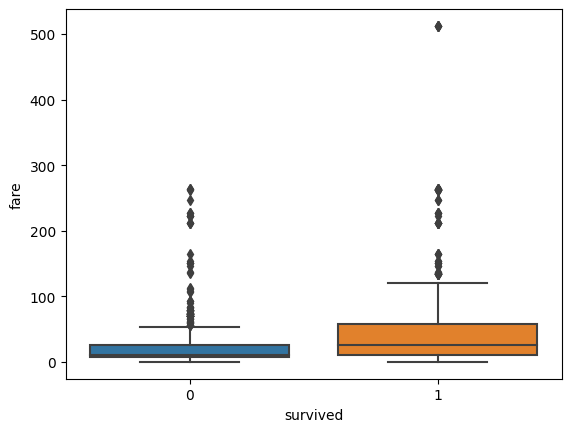

In [10]:
sns.boxplot(x='survived', y='fare', data=df)

## Changing Features for Modeling

In [11]:
df.head(1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"


In [12]:
# df.replace({'male': 1, 'female': 0}, inplace=True)

def sex_to_number(gender):
    if gender == 'male':
        return 1
    elif gender == "female":
        return 0
    else:
        return np.nan

df['sex'] = df['sex'].apply(sex_to_number)



In [13]:
df.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",1,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


View the correlation between variables

In [14]:
df.corr(numeric_only=True).abs()['survived'].sort_values(ascending=False)

survived    1.000000
sex         0.528693
pclass      0.312469
fare        0.244265
parch       0.082660
age         0.055512
sibsp       0.027825
body             NaN
Name: survived, dtype: float64

"Feature Engineering"

In [15]:
df['relatives'] = df.apply(lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
df.corr(numeric_only=True).abs()[["survived"]].sort_values(by="survived", ascending=False)

,survived
survived,1.000000
sex,0.528693
pclass,0.312469
fare,0.244265
relatives,0.201719
parch,0.082660
age,0.055512
sibsp,0.027825
body,NaN


This will be the dataframe that we use for creating a classification model

In [16]:
df = df[['sex', 'pclass','age','relatives','fare','survived']].dropna()

In [17]:
df.head(2)

,sex,pclass,age,relatives,fare,survived
0,0,1,29.00,0,211.3375,1
1,1,1,0.92,1,151.5500,1


## Train and Evaluate a Model

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['sex','pclass','age','relatives','fare']],
                                                     df.survived, test_size=0.2, random_state=0)

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [20]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [21]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


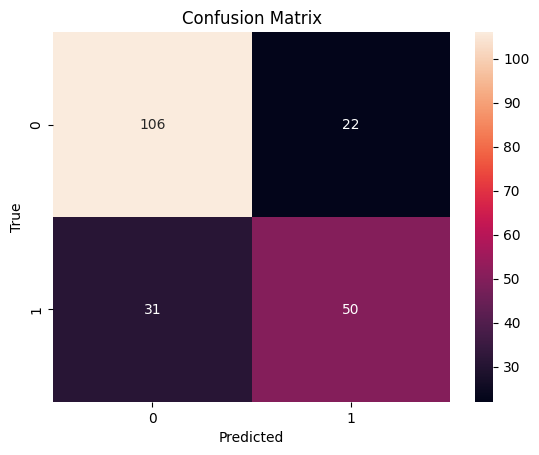

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict_test)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

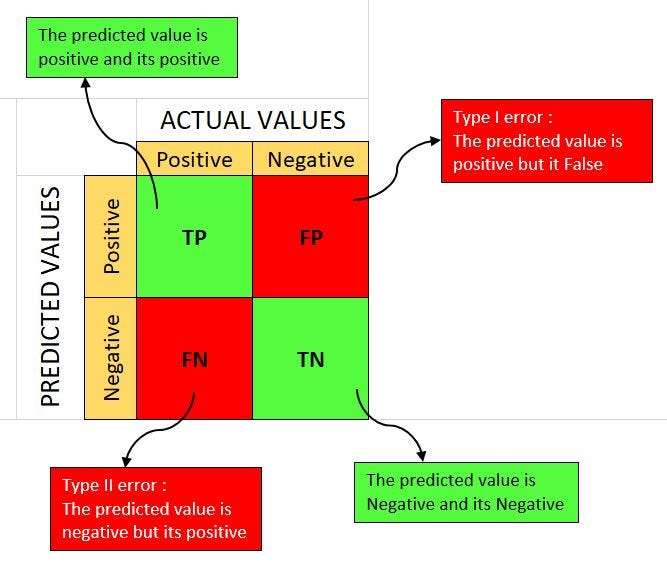

In [23]:
from IPython.display import Image
image_path = 'images/confusion_matrix.jpg'
display(Image(filename=image_path))

In [24]:
# create a classifier using xgboost
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7942583732057417


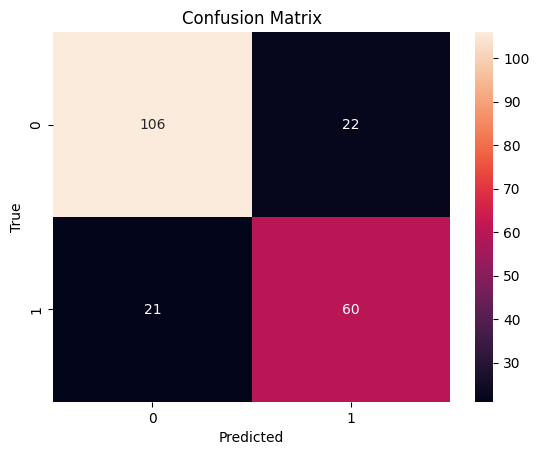

In [25]:
# create a confusion matrix for the xgboost classifier
cm = confusion_matrix(y_test, predict_test)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Neural Network

In [26]:
# imports
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

In [27]:
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 66 (264.00 Byte)
Trainable params: 66 (264.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)


Epoch 1/50


27/27 [==============================] - 1s 2ms/step - loss: 0.6923 - accuracy: 0.5789
Epoch 2/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.5861
Epoch 3/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5861
Epoch 4/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.5861
Epoch 5/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.5921
Epoch 6/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6565 - accuracy: 0.6938
Epoch 7/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6351 - accuracy: 0.7548
Epoch 8/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6094 - accuracy: 0.7691
Epoch 9/50
27/27 [==============================] - 0s 2ms/step - loss: 0.5810 - accuracy: 0.7667
Epoch 10/50
27/27 [==============================] - 0s 2ms/step - loss: 0.5538 - accuracy: 0.7691
Epoch 11/50
27/2

In [31]:
y_pred = np.rint(model.predict(X_test).flatten())
print(metrics.accuracy_score(y_test, y_pred))

7/7 [==============================] - 0s 1ms/step
0.7942583732057417
